# Prediction Using Supervised ML (TASK No. 1)

### Domain : Data Science and Business Analytics Feb 2021

### Author : Amit Zope

### Task : To Predict the percentage of a student based on the number of study hours using Linear Regression.
 

In [22]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns

<b> Importing the data </b>

In [23]:
# reading data from provided link using pandas read_csv
data = pd.read_csv("http://bit.ly/w-data")

print("Data Imported Successfully")

# printing the dimensions of data set using shape
print("\n")
print("Dimensions of Dataset   : {} ".format(data.shape))
print("\n")

# printing the number of rows and columns 
print("Number of rows      : {}".format(data.shape[0]))
print("Number of Columns   : {}".format(data.shape[1]))


Data Imported Successfully


Dimensions of Dataset   : (25, 2) 


Number of rows      : 25
Number of Columns   : 2


In [24]:
# printing the datatypes of columns in data set using dtypes
print(data.dtypes)

# printing the first 9 rows of datset using head
data.head(9)

Hours     float64
Scores      int64
dtype: object


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81


In [25]:
# Checking any null values in data set
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [26]:
# calculating the statistical parameters from describe function
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b> Plotting the data points on 2-D graph so that we can get some insights from data manually </b>

Scatter plot of  No of Hours studied and Percentage Score


[Text(0, 0.5, 'Score Percentage'),
 Text(0.5, 0, 'No. of Hours Studied'),
 Text(0.5, 1.0, 'Percentage of Score vs Hours Studied')]

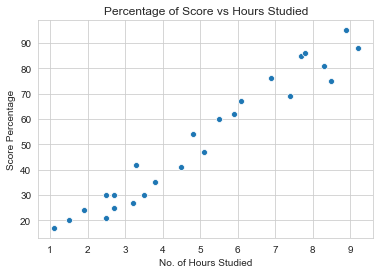

In [27]:
# plotting data and visualizing the data

# making the background white
sns.set_style("whitegrid")

# making scatter plot for variables 
scatterplot1 = sns.scatterplot(x="Hours",y="Scores",data=data)

print("Scatter plot of  No of Hours studied and Percentage Score")
scatterplot1.set(xlabel="No. of Hours Studied",ylabel="Score Percentage",title="Percentage of Score vs Hours Studied")


<b> From the graph it can be seen that the number of hours and score percentage are positively correlated and there is linear pattern. </b>

### Separating independant and dependant variables from data set

In [28]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values


### Spliting the data in train and test sets.

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
# instance of LinearRegression
Lreg = LinearRegression()

# fitting the model
Lreg.fit(x_train,y_train)

print("Training of Model Completed")

Training of Model Completed


Regression plot of  No of Hours studied and Percentage Score


[Text(0, 0.5, 'Score Percentage'),
 Text(0.5, 0, 'No. of Hours Studied'),
 Text(0.5, 1.0, 'Percentage of Score vs Hours Studied')]

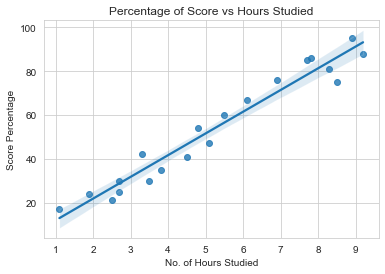

In [31]:
# ploting the training set

regressionplottrain = sns.regplot(x=x_train,y=y_train,data=data)
print("Regression plot of  No of Hours studied and Percentage Score")
regressionplottrain.set(xlabel="No. of Hours Studied",ylabel="Score Percentage",title="Percentage of Score vs Hours Studied")

Regression plot Testing set   No of Hours studied and Percentage Score


[Text(0, 0.5, 'Score Percentage'),
 Text(0.5, 0, 'No. of Hours Studied'),
 Text(0.5, 1.0, 'Percentage of Score vs Hours Studied')]

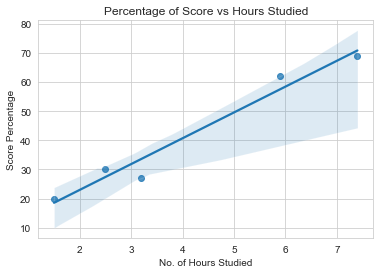

In [32]:
# ploting the testing set

regressionplottest = sns.regplot(x=x_test,y=y_test,data=data)
print("Regression plot Testing set   No of Hours studied and Percentage Score")
regressionplottest.set(xlabel="No. of Hours Studied",ylabel="Score Percentage",title="Percentage of Score vs Hours Studied")

In [39]:
# values of intercept and coefficient of regression line y = mx +c 
print("Value of Intercept c  : ",Lreg.intercept_)
print("Value of slope m  : ",Lreg.coef_)

Value of Intercept c  :  2.018160041434683
Value of slope m  :  [9.91065648]


[Text(0, 0.5, 'Score Percentage'),
 Text(0.5, 0, 'No. of Hours Studied'),
 Text(0.5, 1.0, 'Percentage of Score vs Hours Studied')]

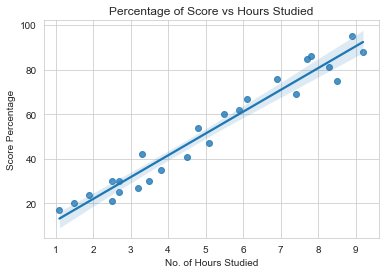

In [34]:
# Plotting the regression line for both training and test data i.e entire data
finalregressionline = sns.regplot(x=X,y=Y,data=data)
finalregressionline.set(xlabel="No. of Hours Studied",ylabel="Score Percentage",title="Percentage of Score vs Hours Studied")

### Predicting the score percentage based on number of Study hours

In [35]:
# predicting the score percentage using predict method
# printing testing data 
print(x_test)
y_pred = Lreg.predict(x_test)

actualpred = pd.DataFrame({'Actual %':y_test,"Predicted %":y_pred})
actualpred

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Actual %,Predicted %
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if student studies for 9.25hrs/day?

In [36]:
# Predicting the actual score percentage by giving input

no_of_hours = np.array(9.25).reshape(-1,1)
print(no_of_hours)
predicted_value = Lreg.predict(no_of_hours)
print(predicted_value)
predictedframe = pd.DataFrame({"No of Hours ":no_of_hours[0],"Predicted Score Percentage ":predicted_value})
predictedframe

[[9.25]]
[93.69173249]


,No of Hours,Predicted Score Percentage
0,9.25,93.691732


### Evaluating the Model

In [38]:
from sklearn.metrics import mean_absolute_error,r2_score

print("Mean Absolute Error : {}".format(mean_absolute_error(y_test,y_pred)))
print("R Squared Value : {}".format(r2_score(y_test,y_pred)))

Mean Absolute Error : 4.183859899002975
R Squared Value : 0.9454906892105356
